**This notebook provides and introduction to using the RDKit**

Import the necessary Python libraries

In [33]:
from rdkit import Chem #RDKit Chemistry
from rdkit.Chem.Draw import IPythonConsole #RDKit drawing
from rdkit.Chem import Draw #RDKit drawing
# A few settings to improve the quality of structures 
from rdkit.Chem import rdDepictor
IPythonConsole.ipython_useSVG = True
rdDepictor.SetPreferCoordGen(True)
from rdkit.Chem import PandasTools #Add the ability to add a molecule to a dataframegrid
import mols2grid #The mols2grid library provides a convenient way of displaying molecules in a grid

Create a molecule (benzene) from a SMILES string

In [34]:
mol = Chem.MolFromSmiles("c1ccccc1")

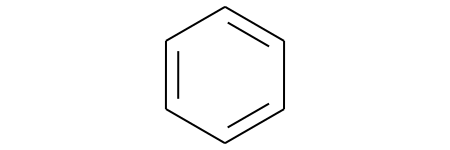

In [35]:
mol

Get SMILES fro Gleevec from ChEMBL

- [From ChEMBL](https://www.ebi.ac.uk/chembl/compound/inspect/CHEMBL941)

In [36]:
glvc = Chem.MolFromSmiles("CN1CCN(Cc2ccc(cc2)C(=O)Nc3ccc(C)c(Nc4nccc(n4)c5cccnc5)c3)CC1")

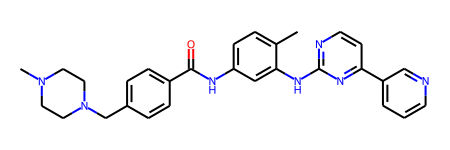

In [37]:
glvc

Read a set of molecules from an SD file

In [38]:
mols = [x for x in Chem.SDMolSupplier("example_compounds.sdf")]

In [39]:
mols

Draw these molecules as a grid

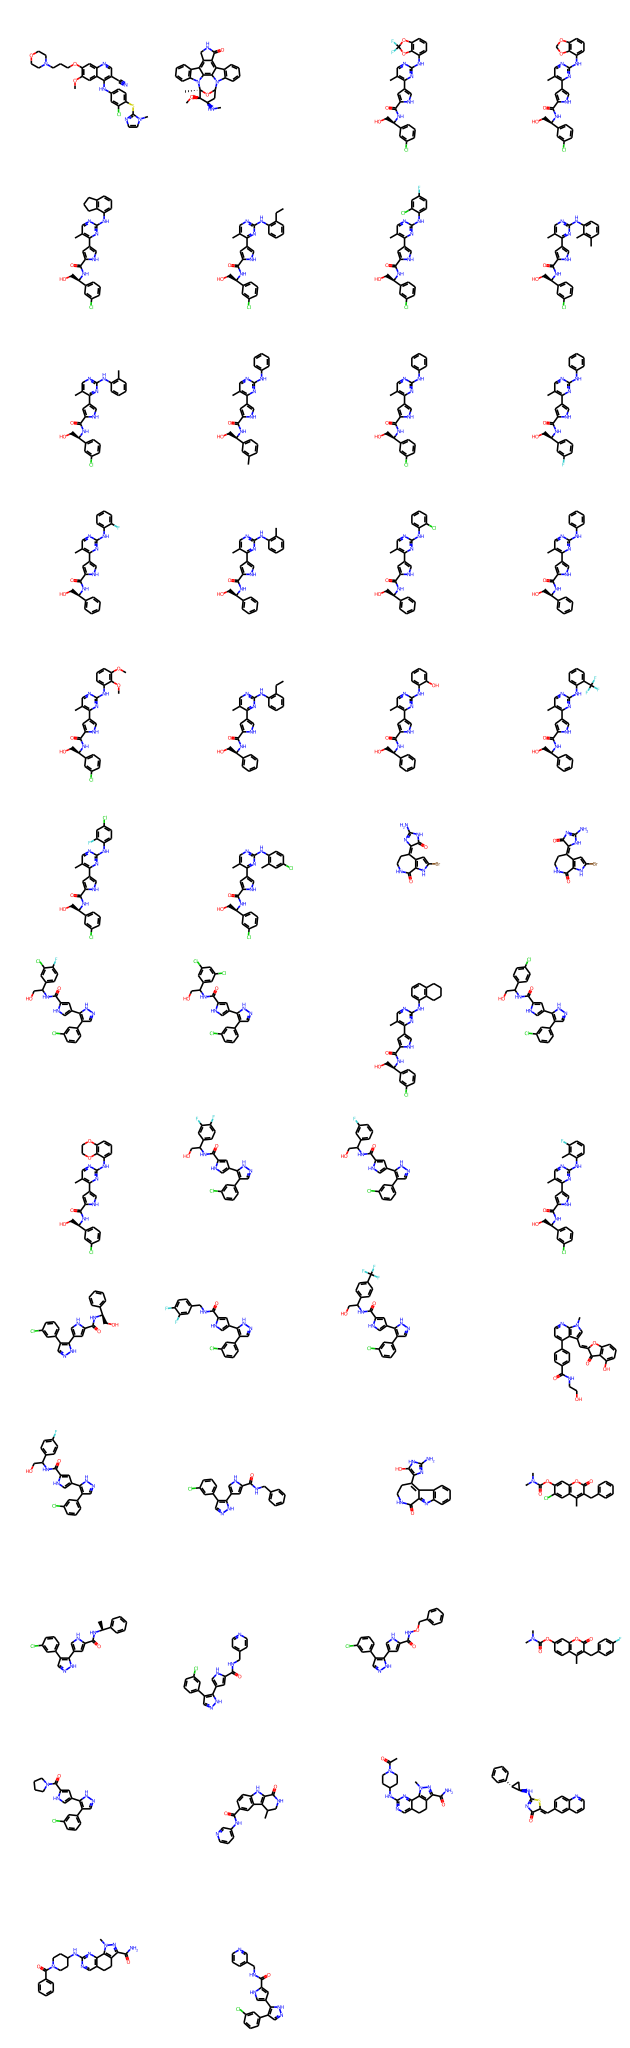

In [40]:
Draw.MolsToGridImage(mols,molsPerRow=4,useSVG=True)

We can use the mols2grid library to display molecules in a grid

In [41]:
mols2grid.display(mols)

In [42]:
mols2grid.selection

{}

We can also read an SD file into a Pandas dataframe. 

In [43]:
df = PandasTools.LoadSDF("example_compounds.sdf")

,ID,ROMol
0,168691 CHEMBL318804,
1,86358 CHEMBL162,
2,575087 CHEMBL576683,
3,575065 CHEMBL571484,
4,575047 CHEMBL568937,

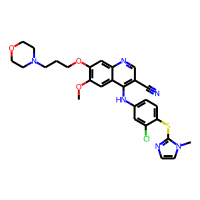
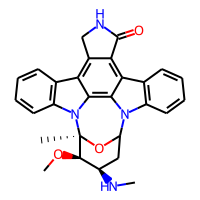
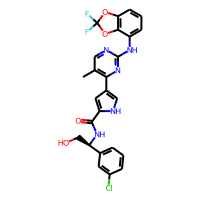
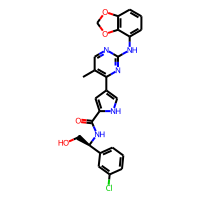
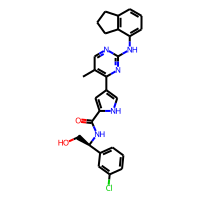

In [44]:
df.head()

Let's add columns with molecular weight and LogP to the dataframe.

In [45]:
from rdkit.Chem.Descriptors import MolWt
from rdkit.Chem.Crippen import MolLogP
df['MW'] = [MolWt(x) for x in df.ROMol]
df['LogP'] = [MolLogP(x) for x in df.ROMol]

,ID,ROMol,MW,LogP
0,168691 CHEMBL318804,,565.099,5.49788
1,86358 CHEMBL162,,466.541,4.35400
2,575087 CHEMBL576683,,527.915,4.96202
3,575065 CHEMBL571484,,491.935,4.36922
4,575047 CHEMBL568937,,487.991,5.12922

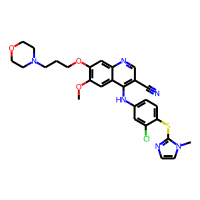
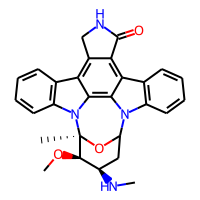
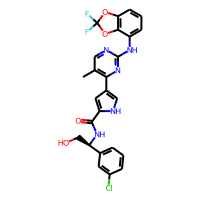
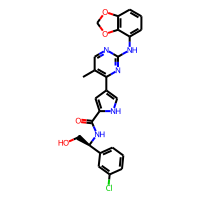
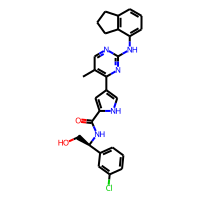

In [46]:
df.head()

We can use a boxplot to examine the distribution of molecular weight within the dataframe. 

In [47]:
import seaborn as sns

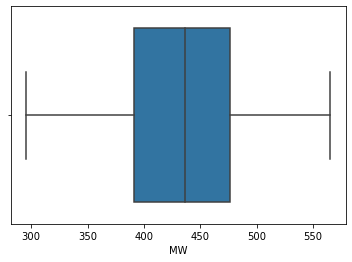

In [48]:
ax = sns.boxplot(x=df.MW)